<a href="https://colab.research.google.com/github/AchiengMary/python-by-examples/blob/main/AWARD_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# For handling warnings
import warnings
warnings.filterwarnings('ignore')

# Show plots inline
%matplotlib inline

In [8]:
# Load dataset
df=pd.read_csv('AWARD.csv', encoding='cp1252')

# View first few rows
df.head()

,Country,Region,Year,Month,Rainfall_mm
0,Kenya,Nairobi,2018,1,25.41
1,Kenya,Nairobi,2018,2,214.89
2,Kenya,Nairobi,2018,3,218.55
3,Kenya,Nairobi,2018,4,256.78
4,Kenya,Nairobi,2018,5,291.81


In [9]:
df.info()
df.describe()
df.columns
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      900 non-null    object 
 1   Region       900 non-null    object 
 2   Year         900 non-null    int64  
 3   Month        900 non-null    int64  
 4   Rainfall_mm  900 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 35.3+ KB


,0
Country,0
Region,0
Year,0
Month,0
Rainfall_mm,0


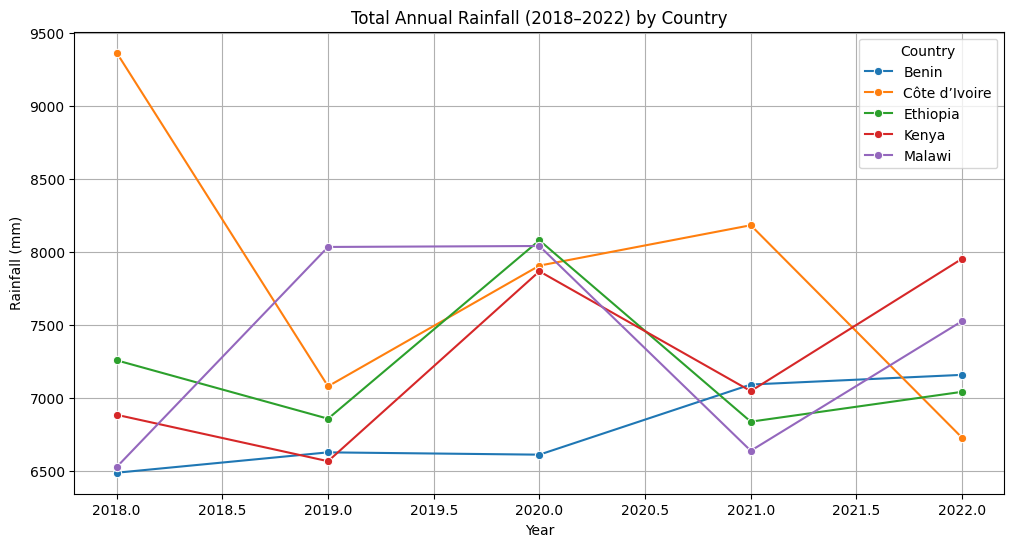

In [10]:
# Group by country and year
annual_rainfall = df.groupby(['Country', 'Year'])['Rainfall_mm'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=annual_rainfall, x='Year', y='Rainfall_mm', hue='Country', marker='o')
plt.title('Total Annual Rainfall (2018–2022) by Country')
plt.ylabel('Rainfall (mm)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

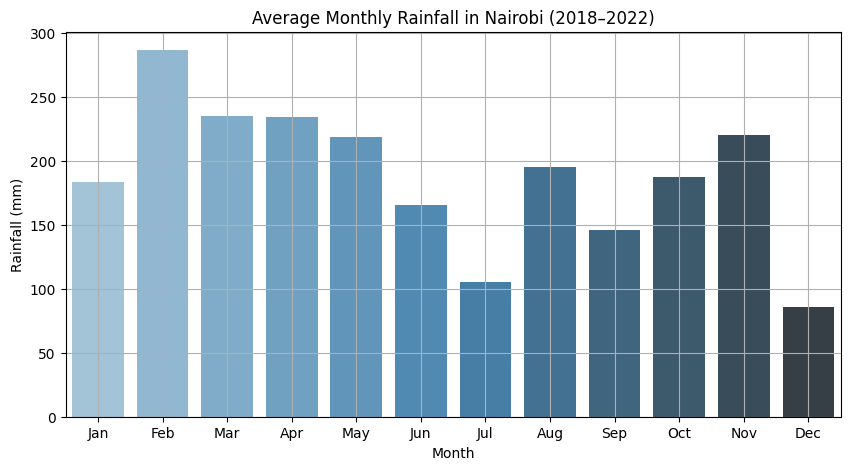

In [11]:
# Filter for Nairobi region
nairobi = df[(df['Country'] == 'Kenya') & (df['Region'] == 'Nairobi')]

# Group by month
monthly_avg = nairobi.groupby('Month')['Rainfall_mm'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_avg, x='Month', y='Rainfall_mm', palette='Blues_d')
plt.title('Average Monthly Rainfall in Nairobi (2018–2022)')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.xticks(range(0,12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

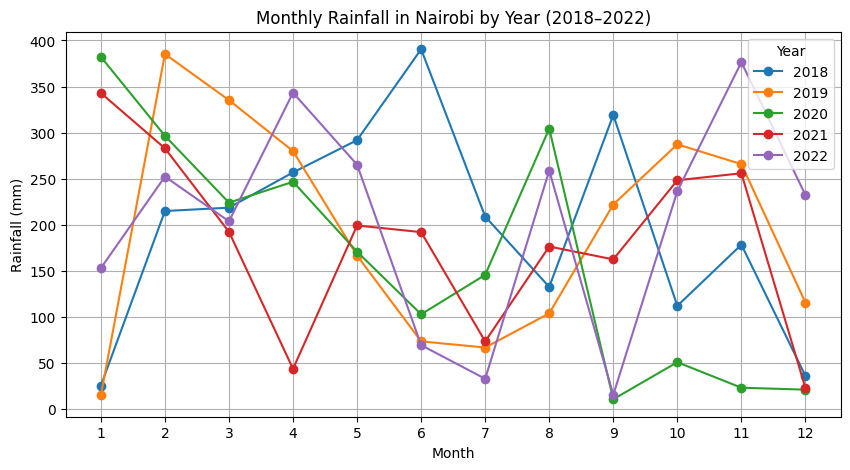

In [12]:
# Pivot rainfall by year for Nairobi
monthly_year = nairobi.pivot(index='Month', columns='Year', values='Rainfall_mm')

monthly_year.plot(figsize=(10, 5), marker='o')
plt.title('Monthly Rainfall in Nairobi by Year (2018–2022)')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.xticks(range(1,13))
plt.legend(title='Year')
plt.show()